<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Class_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

% Title
% ----
\title{Nueral Network: Projects 3D normal-dsitrbuted data onto a unit-radius Sphere}
%

### Introduction
Task: Create a (fully connected) neural network model that approximate the function for project input data x (normal-distributed) onto a unit-radius sphere space.

$y = f(x; \theta, w) = \phi(x; \theta)^T w$

Structure of report
1. create Dataset X and corresponding Y that projected on the unit sphere.
2. Define a cost function
3. Define a optimization procedure
4. Define a model
5. Train the Model
6. Define parameters
7. Model performance
8. Prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

$\mu = [0, 0, 0]$

$\Sigma=
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
$

X is generated with mean =0 and variance =1 (standard deviation = 1), they are randomly cluster around co-cordinate of [0, 0, 0] in a 3-D space.
$X_i$ is linearly independent to each other with $i = \{1, 2, 3\}$. 

Y = X normalized by its euclidean distance.

$Y_{ij} = \frac{X_{ij}}{\sqrt{X_{1j}^2 + X_{2j}^2+X_{3j}^2}}$

Denominator is the radius of the sphere.

In [3]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [4]:
united = np.random.multivariate_normal(mean, cov, 4000)

In [5]:
x11, x22, x33 = united.T
united_y = unit_sphere(united)

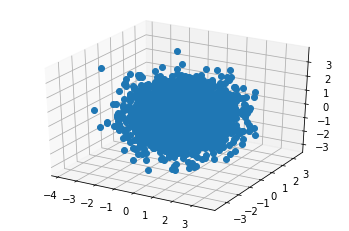

In [6]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

### Training, validation, test split
- using the train_test_split() function provided in sklearn.
- Call the function twice to acquire Training set, Validation set and test set. 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.25)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

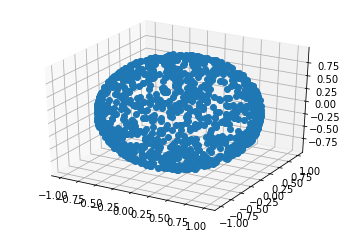

In [ ]:
x11, x22, x33 = Y_test.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers

Using TensorFlow backend.


In [30]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)

### Define Nueral Network architecture

This is a Three-layer feedforward neural network

$f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$

$f^{(1)}$ is the first hidden layer with 10 neurons and activation function = ReLU

$F^{(1)}(x) = W^Tx$

In our case $x=[x_1, x_2, x_3]$

$h_i = max\{0, x* \begin{bmatrix}{w_1 \\ w_2 \\ w_3} \end{bmatrix} + bias\}$

$h_i$ is the first neuron of the first hidden layer, $i= \{1,2,..,10\}$, in 1 row.
We have 10 neurons (unit) in the first hidden layer, so we have to multiply 10 sets of weights

$$
max\{0,
\begin{bmatrix}
w_{0,1} & w_{0,2} & w_{0,3} \\
w_{1,1} & w_{1,2} & w_{1,3} \\
w_{2,1} & w_{2,2} & w_{2,3} \\
\vdots & \vdots & \vdots \\
w_{9,1} & w_{9,2} & w_{9,3} \\
\end{bmatrix} *\begin{bmatrix}{x_0^{(0)} \\ x_1^{(0)} \\ x_2^{(0)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the first hidden layer $h^{(1)}$.


$f^{(2)}$ is the second hidden layer with 10 neurons, and ReLU activation functions.


$$
max\{0,
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\vdots & \vdots & \vdots \\
w_{9,1} & \cdots & w_{9,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(1)} \\ h_1^{(1)} \\ \vdots \\ h_9^{(1)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the second hidden layer $h^{(2)}$.


$f^{(3)}$ is an output layer with 3 output units, and Linear activation

$$
c*\{
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(2)} \\ h_1^{(2)} \\ \vdots \\ h_9^{(2)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ b_1 \\ b_2} \end{bmatrix}\}
$$

Applying Linear function to each specific component of the resulting vector inside.


In [11]:
# training dataset
batch_size = 100

In [12]:
X_train = tf.cast(X_train, tf.float32)
Y_train = tf.cast(Y_train, tf.float32)

In [13]:
X_val = tf.cast(X_val, tf.float32)
Y_val = tf.cast(Y_val, tf.float32)

In [14]:
X_test = tf.cast(X_test, tf.float32)

In [15]:
# creates a dataset with a separate element fro each row of the input tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size= 3000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).shuffle(1000).batch(batch_size)

In [26]:
optimizer = tf.keras.optimizers.Adam(1e-3)
epochs = 1

In [17]:
# create an loss function # not effective
def Keras_loss_function(y_actual, y_predicted):
  mse = kb.mean(kb.sum(kb.square(y_actual - y_predicted))) # (1/n*(sum(sqr(Y-Y_hat))))
  return mse

# first 100 epochs is useful

### Design a cost function
For MiniBatch size = N
Y_actual and Y_predict is a 100 (rows) * 3(columns) matrix

2 Options

First Option - custom cost function

$$
\frac{\sum\limits_{j=1}^{N} \sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{N}
$$

This is more traditional, one loss score for each mini-batch trained

Second Option - tf.keras.losses.MSE

$$
\frac{\sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{3}
$$

output is a vector of loss score associates with each row in the minibatch.


### Model preparation
1. Generate 4,000 rows of X and corresponding Y
2. using the train_test_split() function provided in sklearn.
3. Call the function first time to have 20% of dataset as test set, then call the function second time on the remaining 80% to get the training set and validation set.
4. call tf.data.Dataset.from_tensor_slices() to create an input pipeline for both training and validation set, then chain with Dataset.batch() to make the Dataset object iterable.
5. Define optimization function = 'Adam' with learning rate 0.001


## Modelling
1. In 1 epoch
1. Sample a mini-batch = 100 rows from X_train and Y_train. 
2. Calculate the $\hat{Y}$ by complete one feedforward process with the Nueral Network architecture described above.

$\hat{Y} = a*\{max\{0, W^T_1(max\{0, W^T_0*x +c\}+b)+d\} + k\} + z$
3. $W^T_1$ and $ W^T_0$ are 2 weight matrix.
4. they all initialized with very small randome non-zero number.
5. $c, b, d, k, z$ are all bias vectors, initialized with 0.
6. After calculated the $\hat{Y}$, apply the loss function to the $\hat{Y}$ to compare with actual $Y$ to get the score of performance of the feedforward model. 
7. Then the model calculates the partial derivative for each weight in weight matrix and each bias in every bias vector.


In [31]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # compute the loss value for this minibatch
      mse = Keras_loss_function(y_batch_train, linear)
      # mse = tf.keras.losses.MSE(y_batch_train, linear)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    print(model.trainable_weights)
    grads = tape.gradient(mse, model.trainable_weights)
    print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(mse))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = Keras_loss_function(y_batch_val, val_linear)

  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_mse)))



Start of epoch 0
[<tf.Variable 'dense_12/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[-0.11377555,  0.11809993,  0.37580025,  0.43479347,  0.35018778,
         0.42351282, -0.5201422 ,  0.6103506 , -0.25622222, -0.22516006],
       [-0.23594764,  0.5562295 , -0.312525  , -0.5565874 ,  0.50241625,
        -0.1232264 , -0.45530063, -0.44728845, -0.38207677, -0.07156122],
       [ 0.22299188,  0.08124804, -0.40540096, -0.3282554 , -0.47404438,
         0.61153686, -0.45654005,  0.07829088, -0.3185025 ,  0.61138904]],
      dtype=float32)>, <tf.Variable 'dense_12/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_13/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.2274968 , -0.02274424, -0.01999277, -0.28664395,  0.4551766 ,
         0.39786613,  0.17791796, -0.01441854,  0.5034536 ,  0.47659743],
       [ 0.05398345,  0.03556389,  0.23232412,  0.00072879, -0.10722661,
         0.25324678, -0.0914

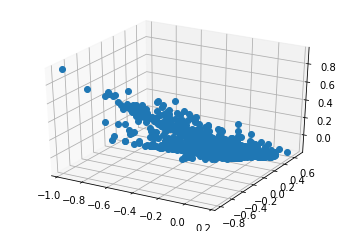

In [19]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [ ]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)
epochs = 2

In [ ]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # print(linear)
      # compute the loss value for this minibatch
      # mse = Keras_loss_function(y_batch_train, linear)
      mse = tf.keras.losses.MSE(y_batch_train, linear)
      reconstruction_error = tf.reduce_mean(mse)
      
      print(mse)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(reconstruction_error))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = tf.keras.losses.MSE(y_batch_val, val_linear)
    val_reconstruction_error = tf.reduce_mean(val_mse)
  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_reconstruction_error)))



Start of epoch 0
tf.Tensor(
[0.3842297  0.42797565 0.3472961  0.27937302 0.33427966 0.16493267
 0.4086562  0.33521208 0.47289905 1.0540316  0.6916525  0.3622521
 0.39382276 0.5528478  0.55679005 0.43935475 0.37818182 0.3618947
 0.521801   0.7617163  0.35995445 0.4703331  0.40040436 0.5288081
 0.7809743  0.37247488 0.5264825  0.4781715  0.83909756 0.34608588
 0.3736016  0.25681335 0.2610033  0.45814824 0.41596866 0.17603369
 0.37793037 0.3476676  0.26313162 0.7729811  0.476038   0.6464086
 0.41478404 0.8852212  0.48054478 0.6424247  0.18614174 0.36385384
 0.41569534 0.16256386 0.61835307 0.3670615  0.56214184 0.4034245
 0.47499433 0.4112301  0.54172355 0.1362366  0.420256   0.07681898
 0.7463608  1.0133843  0.3815819  0.28662837 0.60999894 0.57684857
 0.31372806 0.5327858  0.281065   0.45715943 0.24788512 0.39179942
 0.33333334 0.48476732 0.35954127 0.3360711  0.3392143  0.5164711
 0.20567058 0.2057393  0.42267242 0.23170583 0.33772638 0.22380936
 0.38552478 0.40180376 0.21150778 0.355

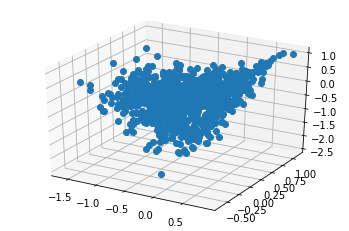

In [ ]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [ ]:
# use Lecture's